# 单感知器神经网络用于线性回归

现在可以通过构建第一个包含单个感知器的神经网络来应用矩阵乘法。
$ 在此任务之后，能够：$
* 实现一个具有单个感知器和单个输入节点的神经网络，用于简单线性回归
* 实现使用矩阵乘法的正向传播
* 实现一个具有单个感知器和两个输入节点的神经网络，用于多重线性回归

# 导入所有的包

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

import pandas as pd

import w3_tools

#绘图命令的输出在 Jupyter 笔记本中内联显示
%matplotlib inline 

# 设置一个种子，是结果一致
# 种子理解为生成随机序列的初始值
np.random.seed(3)

加载笔记本中定义的单元测试

In [2]:
import w3_unittest

## 简单线性回归
线性回归是一种用于建模响应（因变量）与一个或多个解释变量（自变量）之间关系的线性方法。只有一个自变量的情况称为简单线性回归：对于多个自变量，则称为多元线性回归。

## 简单线性回归模型
简单线性回归模型可以表示：
$$\hat{y} = wx + b,\tag{1}$$
y是基于独立变量x使用斜率为w和截距b的直线方程对因变量y的预测。
给定一组训练数据点（x1，y1），……，（xm，ym），目标是找到“最佳”拟合线——即参数w和b，使得原始值yi与预测值y'=wxi+b之间的差异最小。

可以使用一个简单等等神经网络模型来完成这个任务。

## 单感知器和一个输入节点的神经网络模型
最简单的神经网络模型只有一个感知器。接受一些输入并计算输出的值


神经网络的最小构建快被称为节点，一些节点存储输入的数字，而另一些节点存储计算出的值。输入节点（这里只有一个输入节点x）包含网络的数据输入。这些节点被设置为网络的一个输入层。

<img src="images/nn_model_linear_regression_simple.png" style="width:400px;">
神经网络的最小构建块被称为节点。一些节点存储输入的数字，而另一些节点存储计算出的值。《输入节点》（此处只有一个输入节点x)包含网络的数据输入。这些节点被设置为网络的一个《输入层》。

权重（w）和偏差（b）是训练模型时将更新的参数。被初始化为某个随机值或设置为0，并在训练过程中更新。偏差类似于一个独立于任何输入节点的权重。

感知机输出计算简单：首先计算x和权重w的乘积，然后加上偏置。
$$z = w x + b\tag{2}$$

单感知器的输出层只有一个节点$ 输出层 $ y = z。

将所有内容综合起来，从数学上将，单个感知器神经网络模型可以表示为：
\begin{align}
z^{(i)} &=  w x^{(i)} + b,\\
\hat{y}^{(i)} &= z^{(i)},
\tag{3}\end{align}

xi代表第i个训练实例，基于该实例的预测将是yi，i=1，……m。

如果有m个训练实例，向量运算可以把所有的训练实例转换成向量，同时将他们全部计算！
将所有的训练样本组成一个大小为（1✖m）的向量X。然后将标量乘到向量上，加上b，这将广播到大小为（1×m）的向量

(广播是在numpy中，标量和向量相加时，标量会变形成向量的形式)

\begin{align}
Z &=  w X + b,\\
\hat{Y} &= Z,
\tag{4}\end{align}

这一组计算称为$ 前向传播 $ 


现在可以比较Z（1×m）与原始数据向量Y。可以通过`成本函数`来完成，该函数可以衡量预测向量与训练数据之间的接近程度。评估了参数w和b解决该问题的效果（或者说是评估感知器的效果），根据输入的不同，有许多不同的成本函数可选择。


$$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.\tag{5}$$

目标为了尽可能减少成本函数（估算预测结果与实际结果误差的函数），这将减少原始值yi和预测值之间的差异，（除以2m为了缩放）

当权重用一些随机值，还没有进行训练时，不能期望得到好的结果。

对权重和偏置求梯度就是找到成本函数在当前权重和偏置下上升最快的方向和速率

下一步是调整权重和偏置，以最小化成本函数。这个过程称为`反向传播`，并且是迭代进行的：不断把参数微调再重复这个故过程。

构建神经网络的一般方法为：
1. 定义神经网络的结构（输入单元数量、隐藏单元数量等）
2. 初始化模型的参数
3. 循环：
   * 实现前向传播（计算感知器输出）
   * 实现反向传播（获取参数的校正）
   * 更新参数
4. 进行预测

经常需要构建辅助函数来计算步骤1-3，然后将它们合并成一个调用的函数`nn_model()`一旦构建了`nn_model()`并学会了正确的参数，就可以对新数据进行预测。



## 数据集
首先，获取将要工作的数据集。以下代码将创建m=30数据点（x1，y1），……，（xm，ym），并将它们保存到形状为（1×m）的`Numpy`数组`X`和`Y`中。

In [3]:
m = 30
"""
make_regression 函数是scikit-learn库中用于生成用于回归分析的随机数据集。
n_samples=m 定义要生成的样本数量，n_features是特征数量，random_state确保结果可重复
noise是高斯噪声标准差，噪声指无法用模型解释的随机变化或误差，noise参数越大，则数据中的噪声就越弱
random_state：用于设置随机数生成种子，保证结果可重复性

"""
X , Y =make_regression(n_samples=m,n_features=1,noise=20,random_state=1)

X = X.reshape((1,m))
Y = Y.reshape((1,m))

print("X的训练数据:")
print(X)

print("Y的训练数据:")
print(Y)

X的训练数据:
[[ 0.3190391  -1.07296862  0.86540763 -0.17242821  1.14472371  0.50249434
  -2.3015387  -0.68372786 -0.38405435 -0.87785842 -2.06014071 -1.10061918
  -1.09989127  1.13376944  1.74481176 -0.12289023 -0.93576943  1.62434536
   1.46210794  0.90159072 -0.7612069   0.53035547 -0.52817175 -0.26788808
   0.58281521  0.04221375  0.90085595 -0.24937038 -0.61175641 -0.3224172 ]]
Y的训练数据:
[[ -3.01854669 -65.65047675  26.96755728   8.70562603  57.94332628
   -0.69293498 -78.66594473 -12.73881492 -13.26721663 -24.80488085
  -74.24484385 -39.99533724 -22.70174437  73.46766345  55.7257405
   23.80417646 -13.45481508  25.57952246  75.91238321  50.91155323
  -43.7191551   -1.7025559  -16.44931235 -33.54041234  20.4505961
   18.35949302  37.69029586  -1.04801683  -4.47915933 -20.89431647]]


加载此笔记本定义的单元测试

### 绘制数据集：

Text(0, 0.5, '$y$')

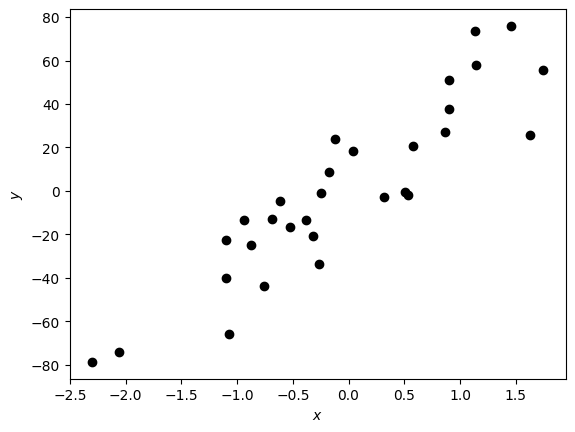

In [4]:
plt.scatter(X,Y,c="black")

plt.xlabel("$x$")
plt.ylabel("$y$")

## 练习
什么是变量X和Y的shape？此外，你有多少个样本？
X和Y存储着样本特征、样本类别、样本数量

In [5]:

shape_X = X.shape
shape_Y = Y.shape
m = X.size


print("the shape X:"+str(shape_X))
print("the shape Y:"+str(shape_Y))
print("我有训练样本m= %d 训练"%(m))


the shape X:(1, 30)
the shape Y:(1, 30)
我有训练样本m= 30 训练


## 线性回归神经网络模型的实现
将拓展此简单模型拓展到复杂的结构方式处理神经网络。

## 定义神经网络结构

## 练习
定义两个变量：
* 输入层大小
* 输出层大小

In [6]:
def layer_sizes(X,Y):
    """
    输入：
    X -- 输入的属性集(特征数量，样本数量)
    Y -- 输出的标签集(分类，样本数量)
    
    返回：
    n_x -- 输入特征的数量
    n_y -- 输出类别的数量
    
    """

    n_x = X.shape[0]
    n_y = Y.shape[0]

    return (n_x,n_y)

In [7]:
(n_x,n_y) = layer_sizes(X,Y)
print("输入层的形状是:"+str(n_x))
print("输出层的形状是:"+str(n_y))

输入层的形状是:1
输出层的形状是:1


In [8]:
w3_unittest.test_layer_sizes(layer_sizes)

 All tests passed


## 初始化模型的参数

## 练习
实现函数`initialize_parameters()`

请看一下说明：
- 确保参数大小
- 随机值初始化权重矩阵
    - 使用`np.random(a,b) ** 0.01`随机初始化形状为(a,b)的矩阵
 
- 将初始化偏置为零
    - 使用`np.zeros((a,b))`初始化形状为(a,b)的零矩阵

In [9]:
# 用于初始化模型参数的函数
def initialize_parameters(n_x,n_y):
    # 形状权重矩阵(n_x,n_y)
    W = np.random.randn(n_y,n_x)*0.01
    # 偏置矩阵(n_y,1)
    b = np.zeros((n_y,1))

    assert(W.shape == (n_y,n_x))
    assert(b.shape == (n_y,1))
    # 返回权重和偏置的，按键值对的形式
    parameters = {"W":W,
                  "b":b}
    return parameters

In [10]:
parameters = initialize_parameters(n_x, n_y)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[0.01788628]]
b = [[0.]]


预期输出
注意：数组W的元素可能因为随机初始化而不同。尝试重新启动内核以获取相同的值

In [11]:
# 在单元测试中不检查实际值（由于随机初始化）
w3_unittest.test_initialize_parameters(initialize_parameters)

 All tests passed


## 循环

## 练习
实现`forward_propagation()`

请看以下说明
- 查看模型的数学表示形式
\begin{align}
Z &=  w X + b\\
\hat{Y} &= Z,
\end{align}
- 需要实施的步骤是：
  1. 从字典"parameters"(即`initialize_parameters()` 的输出中通过`parameters["……"]获取每个参数
  2. 实现前向传播。计算Z，通过乘以数组w、x并加上向量b。将预测数组A设置为Z。

In [12]:
# 用于实现输出的函数
def forward_propagation(X,parameters):
    """
    Argument:
    X -- 输入样本形状(n_x,m)
    parameters -- python字典存储参数（初始化函数的输出）

    返回：
    Y_hat -- 输出
    
    """
    W = parameters["W"]
    b = parameters["b"]

    # np.dot计算两个数组的点积
    Z =np.dot(W,X)+b
    Y_hat = Z

    assert(Y_hat.shape ==(n_y,X.shape[1]))

    return Y_hat

In [13]:
Y_hat = forward_propagation(X,parameters)

print(Y_hat)

[[ 0.00570642 -0.01919142  0.01547893 -0.0030841   0.02047485  0.00898776
  -0.04116598 -0.01222935 -0.00686931 -0.01570163 -0.03684826 -0.01968599
  -0.01967297  0.02027892  0.0312082  -0.00219805 -0.01673744  0.0290535
   0.02615168  0.01612611 -0.01361516  0.00948609 -0.00944703 -0.00479152
   0.0104244   0.00075505  0.01611297 -0.00446031 -0.01094205 -0.00576685]]


预期输出：
注意：数组Y_hat的元素可能因为初始参数不同而不同。如果想得到完全相同的结果，尝试重新启动内核并重新运行。

In [14]:
w3_unittest.test_forward_propagation(forward_propagation)

 All tests passed


请记住，权重只是用一些随机值初始化的，所有模型尚未经过训练。
定义一个成本函数，用于训练模型。
$$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2$$

In [15]:
def compute_cost(Y_hat,Y):
    """
    输入：
    Y_hat-- 形状神经网络的输出（n_y，示例数）
    Y -- 标签的形状向量(n_y,示例数)

    返回：
    带入样本后，成本函数值
    """
    # 如果是二维矩阵，m 是 Y的列数
    m =Y.shape[1]
    cost = np.sum((Y_hat - Y ) ** 2)/(2*m)

    return cost

In [16]:
print("cost = " + str(compute_cost(Y_hat,Y)))

cost = 790.2189412622606


尽可能减少成本函数的值（因为这代表预测值和实际值的误差）

为了实现这一点，需要进行反向传播。目前，可以使用上传工具箱的函数`train_nn()`来获取循环每一步的更新参数。

In [17]:
parameters = w3_tools.train_nn(parameters,Y_hat,X,Y)

print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[43.63366703]]
b = [[0.17926448]]


## 在nn_model()中整合之前的函数

在`nn_model()`中构建神经网络。

神经网络模型必须按照正确的顺序使用之前的函数。

In [18]:
def nn_model(X,Y,num_iterations=10,print_cost=False):
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[1]

    # 初始化参数
    parameters = initialize_parameters(n_x,n_y)

    for  i in range(0,num_iterations):
        Y_hat = np.dot(parameters["W"],X) + parameters["b"]

        # 成本函数. 输入:"Y_hat,Y".Outputs:"Y_hat".
        cost = np.sum((Y_hat - Y)**2)/(2*Y.shape[1])

        # 更新参数
        parameters = w3_tools.train_nn(parameters,Y_hat,X,Y)

        # 打印每次迭代的成本函数
        if print_cost:
            print("迭代后的成本 %i : %f" % (i,cost))

    return parameters

In [19]:
parameters = nn_model(X, Y, num_iterations=15, print_cost=True)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W_simple = parameters["W"]
b_simple = parameters["b"]

迭代后的成本 0 : 791.431703
迭代后的成本 1 : 176.530000
迭代后的成本 2 : 143.772255
迭代后的成本 3 : 141.433606
迭代后的成本 4 : 141.248744
迭代后的成本 5 : 141.233728
迭代后的成本 6 : 141.232500
迭代后的成本 7 : 141.232400
迭代后的成本 8 : 141.232391
迭代后的成本 9 : 141.232391
迭代后的成本 10 : 141.232391
迭代后的成本 11 : 141.232391
迭代后的成本 12 : 141.232391
迭代后的成本 13 : 141.232391
迭代后的成本 14 : 141.232391
W = [[35.71958208]]
b = [[2.2893077]]


In [20]:
# 在单元测试中不检查实际值，由于随机初始化
w3_unittest.test_nn_model(nn_model)

 All tests passed


可以看到，经过几次迭代后，代价函数不再变化(模型收敛)

注意：这是一个非常简单的模型。实际上，模型并不那么快收敛。

最终模型参数可用于进行预测。让我们绘制线性回归线和一些预测点。回归线为红色，预测点为蓝色。

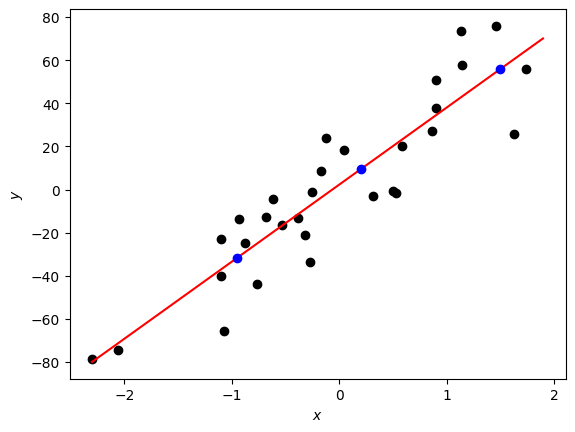

In [21]:
X_pred = np.array([-0.95, 0.2, 1.5])

fig, ax = plt.subplots()
plt.scatter(X, Y, color = "black")

plt.xlabel("$x$")
plt.ylabel("$y$")
    
X_line = np.arange(np.min(X[0,:]),np.max(X[0,:])*1.1, 0.1)
ax.plot(X_line, W_simple[0,0] * X_line + b_simple[0,0], "r")
ax.plot(X_pred, W_simple[0,0] * X_pred + b_simple[0,0], "bo")
plt.plot()
plt.show()

## 多元线性回归
模型不会那么简单。在某些情况下，输出不仅仅取决一个变量。如果是两个输入变量呢？

多元线性回归模型，包含两个自变量x1，x2，可以表示为
$$\hat{y} = w_1x_1 + w_2x_2 + b = Wx + b,\tag{6}$$
输入向量x = [x1,x2]与参数向量W = [W1,W2]的点积为W · x，标量参数b是截距。

目标：找到一个使成本函数最小的参数"w1,w2和b"

可以使用更复杂的神经网络

还是一个感知器，但现在又两个输入节点：
<img src="images/nn_model_linear_regression_multiple.png" style="width:420px;">
感知器对每个训练样本$x^{(i)} = \begin{bmatrix} x_1^{(i)} & x_2^{(i)}\end{bmatrix}$ 可以用点积表示
$$z^{(i)} = w_1x_1^{(i)} + w_2x_2^{(i)} + b = Wx^{(i)} + b,\tag{7}$$  
权重在向量W = [w1,w2]中，偏置b是一个标量。输出层只有一个节点。

将训练样本放在矩阵(2 × m )的矩阵X，将$x_1^{(i)}$和$x_2^{(i)}$放到列中， $W$ ($1 \times 2$) 和 $X$ ($2 \times m$) 得到一个 ($1 \times m$) 的向量
$$WX = 
\begin{bmatrix} w_1 & w_2\end{bmatrix} 
\begin{bmatrix} 
x_1^{(1)} & x_1^{(2)} & \dots & x_1^{(m)} \\ 
x_2^{(1)} & x_2^{(2)} & \dots & x_2^{(m)} \\ \end{bmatrix}
=\begin{bmatrix} 
w_1x_1^{(1)} + w_2x_2^{(1)} & 
w_1x_1^{(2)} + w_2x_2^{(2)} & \dots & 
w_1x_1^{(m)} + w_2x_2^{(m)}\end{bmatrix}.$$

并且该模型可以表示为
\begin{align}
Z &=  W X + b,\\
\hat{Y} &= Z,
\tag{8}\end{align}

b被广播道大小为(1✖m)的向量中。这些正是在正向传播步骤中的运算。

## 数据集
让我们为 Kaggle 数据集房价建立一个线性回归模型，该数据集保存在文件 data/house_prices_train.csv中。您将使用两个字段——地面居住面积（ GrLivArea ，平方英尺）和整体材料及装修质量评分（ OverallQual ，1-10）来预测销售价格（ SalePrice ，美元）。

打开数据集可以使用 pandas 函数 read_csv ：

In [22]:
df = pd.read_csv('data/house_prices_train.csv')

数据现在已保存为变量 df ，作为一个 DataFrame，这是最常用的 pandas 对象。它是一个具有不同类型列的二维标记数据结构。你可以将其视为表格或电子表格。完整文档可在此处找到。

选择所需的字段并将它们保存在变量 X_multi ， Y_multi 中：

In [23]:
X_multi = df[['GrLivArea','OverallQual']]
Y_multi = df['SalePrice']

查看数据

In [24]:
print(f"X_multi:\n{X_multi}\n")
print(f"Y_multi:\n{Y_multi}\n")

X_multi:
      GrLivArea  OverallQual
0          1710            7
1          1262            6
2          1786            7
3          1717            7
4          2198            8
...         ...          ...
1455       1647            6
1456       2073            6
1457       2340            7
1458       1078            5
1459       1256            5

[1460 rows x 2 columns]

Y_multi:
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64



原始数据具有不同单位，为了使神经网络训练高效，需要将它们转换为相同单位。实现这一目标的一种常见方法称为归一化：从数组的每个元素中减去数组的平均值，然后除以标准差（一组值的分散程度的统计量）。

以前np.std 作用于 pandas 数据框时默认按列计算标准差，而未来版本会对整个数据框（即行和列两个维度）计算标准差并返回一个标量值。

Ai给出的解决方案：
有两种解决方法，你可以根据具体需求选择：
使用 numpy 数组：将 pandas 数据框转换为 numpy 数组，这样就不会受到 pandas 函数行为变化的影响。
指定 axis 参数：在 np.std 函数中明确指定 axis 参数，确保按列计算标准差。

In [25]:
X_multi_norm = (X_multi - np.mean(X_multi,axis=0))/np.std(X_multi,axis=0)
Y_multi_norm = (Y_multi - np.mean(Y_multi,axis=0))/np.std(Y_multi,axis=0)


将结果转换为Numpy数组，转置X_multi_norm 以获得形状为(2×m)的数组，并重塑Y_multi_norm 以使其形状变为(1×m)

In [26]:
X_multi_norm = np.array(X_multi_norm).T
Y_multi_norm = np.array(Y_multi_norm).reshape((1, len(Y_multi_norm)))

print ('X的形状: ' + str(X_multi_norm.shape))
print ('Y的形状: ' + str(Y_multi_norm.shape))
print(f"我有m={(X_multi_norm.shape[1])}个训练样本")

X的形状: (2, 1460)
Y的形状: (1, 1460)
我有m=1460个训练样本


## 多元线性回归神经网络模型的性能
魔法在于现在不需要在神经网络实现中更改任何内容！如果传递新的数据集X_multi_norm 和 Y_multi_norm，输入层大小n等于2，其余实现将保持完全相同。

## 练习
运行上述构建的神经网络模型`nn_model()`进行`100`次迭代，传递存储数组X_multi_norm和Y_multi_norm中的训练数据集

In [27]:
### START CODE HERE ### (~ 1 line of code)
parameters_multi = nn_model(X_multi_norm, Y_multi_norm, num_iterations=100, print_cost=True)
### END CODE HERE ###

print("W = " + str(parameters_multi["W"]))
print("b = " + str(parameters_multi["b"]))

W_multi = parameters_multi["W"]
b_multi = parameters_multi["b"]

迭代后的成本 0 : 0.489797
迭代后的成本 1 : 0.429192
迭代后的成本 2 : 0.380299
迭代后的成本 3 : 0.340051
迭代后的成本 4 : 0.306705
迭代后的成本 5 : 0.279020
迭代后的成本 6 : 0.256020
迭代后的成本 7 : 0.236908
迭代后的成本 8 : 0.221025
迭代后的成本 9 : 0.207827
迭代后的成本 10 : 0.196858
迭代后的成本 11 : 0.187743
迭代后的成本 12 : 0.180169
迭代后的成本 13 : 0.173874
迭代后的成本 14 : 0.168642
迭代后的成本 15 : 0.164295
迭代后的成本 16 : 0.160682
迭代后的成本 17 : 0.157680
迭代后的成本 18 : 0.155185
迭代后的成本 19 : 0.153111
迭代后的成本 20 : 0.151388
迭代后的成本 21 : 0.149956
迭代后的成本 22 : 0.148766
迭代后的成本 23 : 0.147777
迭代后的成本 24 : 0.146955
迭代后的成本 25 : 0.146272
迭代后的成本 26 : 0.145705
迭代后的成本 27 : 0.145233
迭代后的成本 28 : 0.144841
迭代后的成本 29 : 0.144515
迭代后的成本 30 : 0.144245
迭代后的成本 31 : 0.144020
迭代后的成本 32 : 0.143833
迭代后的成本 33 : 0.143677
迭代后的成本 34 : 0.143548
迭代后的成本 35 : 0.143441
迭代后的成本 36 : 0.143352
迭代后的成本 37 : 0.143278
迭代后的成本 38 : 0.143216
迭代后的成本 39 : 0.143165
迭代后的成本 40 : 0.143123
迭代后的成本 41 : 0.143087
迭代后的成本 42 : 0.143058
迭代后的成本 43 : 0.143033
迭代后的成本 44 : 0.143013
迭代后的成本 45 : 0.142996
迭代后的成本 46 : 0.142982
迭代后的成本 47 : 0.142971
迭代

In [28]:
# 注意 
# 实际值随机初始化所以不进行检查
w3_unittest.test_multi(nn_model, X_multi_norm, Y_multi_norm, parameters_multi)

 All tests passed


记住，初始数据集已经归一化，为了进行预测，需要归一化原始数据，使用获得的线性回归系数计算预测，然后对结果进行反归一化(归一化的逆过程)

In [29]:
# 准备预测数据
# 转置后，两行三列，每一列对应一个样本特征，每一特征包括[数值,评分]
X_pred_multi = np.array([[1710, 7], [1200, 6], [2200, 8]]).T
# 数据归一化
X_multi_mean = np.array(np.mean(X_multi, axis=0)).reshape((2, 1))
X_multi_std = np.array(np.std(X_multi, axis=0)).reshape((2, 1))
X_pred_multi_norm = (X_pred_multi - X_multi_mean) / X_multi_std

# 模型预测
Y_pred_multi_norm = np.matmul(W_multi, X_pred_multi_norm) + b_multi
# 结果反归一化
Y_pred_multi = Y_pred_multi_norm * np.std(Y_multi) + np.mean(Y_multi)

# 打印预测结果
print(f"Ground living area, square feet:\n{X_pred_multi[0]}")
print(f"Rates of the overall quality of material and finish, 1 - 10:\n{X_pred_multi[1]}")
print(f"Predictions of sales price, $:\n{np.round(Y_pred_multi)}")

Ground living area, square feet:
[1710 1200 2200]
Rates of the overall quality of material and finish, 1 - 10:
[7 6 8]
Predictions of sales price, $:
[[221371. 160039. 281587.]]
